## LABB2

Kommentarerna säger nästan allt. 

JAg använt AI för att hitta fel och hitta lösning till ett problem jag hade med att "prediction" funktionen 
fick data i olika format beroende på om det fick data från användaren eller fil.

Också jag får inte samma resultat som i facit för den andra testpunkt prediction.
Det beror på att punkten har de 4 närmsta punkter är **Pichu**, men de flesta är **Pikachu**, 
så om man använder olika k värde, får man olika resultat. 
Jag tänkte räkna ett **genomsnittligt avstånd** för att få ett mer exact resultat, men i slutet det bara blir okej i denna specifik fall,
också uppgiften krävde **majoritetsröstning**, så det gjorde jag.

Också, jag tänkte använda *k=11* som default  som antal **Nearest Neighbour** för att undvika ett jämt resultat, typ **5=5** men, igen gjörde som uppgift sa.


Welcome to the Pikachu/Pichu classifier!
 Would you like to:
1 - Input the test point yourself
2 - Read a set of points from the file testpoints.txt
3 - Visualize the dataset as a scatter plot graph
4 - Randomly split the data in a training and test set.


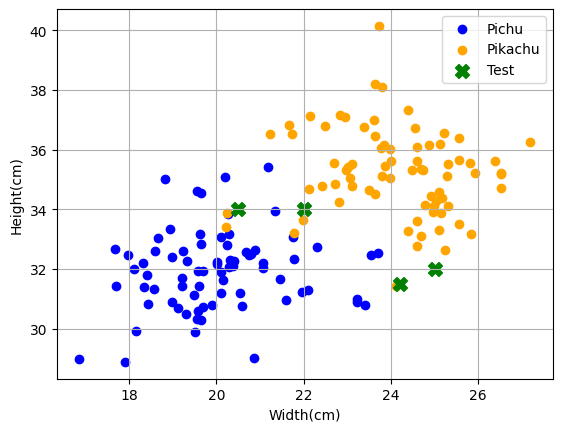

PRediction for point(25.0, 32.0): Pikachu!
PRediction for point(24.2, 31.5): Pichu!
PRediction for point(22.0, 34.0): Pikachu!
PRediction for point(20.5, 34.0): Pichu!


: 

In [ ]:
import matplotlib.pyplot as plt
import math
import random as rnd

file = "datapoints.txt"
test = "testpoints.txt"
test_points = []
all_points = []
k = 10 #number of nearest neighbours to check"
trn = 50 #How many of each pokemon in the training set
tst = 25 #How many of each pokemon in the test set
tloops = 10 #How many times the test loop will run

#I decided to divide the functions in different sections based on functionality

#******************************   DATA CLEANING  ********************************

#This function will strip each line removing all whitespaces and separating values at the comma, then assigning them
def clean_line(line):
    try:
        stripped = [item.strip() for item in line.split(',')]

        width = float(stripped[0])
        height = float(stripped[1])
        label = int(stripped[2])

        return width, height, label
    except (ValueError, IndexError) as e:
        print(f"Skipping line {line.strip()}. Error{e}.")
        return None

# I created the same process for the testpoints file, in case we want to add all test points directly there
def clean_testpoints(line):

    stripped = line.strip()
    clean_line = stripped.lstrip('0123456789. ')
    no_par = clean_line.replace('(', '').replace(')','')
    try:
        coordinates = [float(item.strip()) for item in no_par.split(',')]

        return tuple (coordinates)
    
    except(ValueError,IndexError):
        return None 
    
#Function to make lists with all points of the same label
def split_data(all_points):
    #We first divide the data in two lists by using the label
    pichu_all = [p for p in all_points if p[2]==0]
    pikachu_all = [p for p in all_points if p[2] ==1]

    #Then we shuffle it to make the results randomized
    rnd.shuffle(pichu_all)
    rnd.shuffle(pikachu_all)

    #Now we create the sets
    training_set = pichu_all[:trn] + pikachu_all[:trn]
    test_set = pichu_all[trn:trn+tst] + pikachu_all[trn:trn+tst]

    #and shuffle
    rnd.shuffle(training_set)
    rnd.shuffle(test_set)

    return training_set, test_set



#*************************************** CALCULATIONS *************************************


def euclidean_distance(p1,p2): #The euclidean distance will be used for the nearest neighbour function
    dist_x = p2[0] - p1[0]
    dist_y = p2[1] - p1[1]
    distance = math.sqrt(dist_x**2 + dist_y**2)
    return distance

#Nearest neighbor calculation
def k_nene(training_set, test_point):
    dist_labels = [] #list of labels for distances of NN

    for width,height, label in training_set:
        point = (width,height)
        distance = euclidean_distance(point,test_point)
        dist_labels.append((distance,label))
    
    #We sort the distances to get the smallest ones on top and add the top k ones to the list
    dist_labels.sort()
    nearest = dist_labels[:k]
    
    #Here we add all the labels in the NN list.
    #Being the values 0 and 1, the total will be the number of Pikachus
    #I'm aware that this would not work if we had more labels and we would need to add each NN to its own variable.
    counter = sum(neighbor[1] for neighbor in nearest)

    if counter > (k-counter):
        return 1 #prediction = Pikachu
    else: return 0 #prediction = Pichu


#*****************************************  OUTPUT ***********************************

#Function to print the plots
def plot(all_points, test_points=None):
    pichu_x = []
    pichu_y = []
    pikachu_x = []
    pikachu_y = []

    for point in all_points:
        width,height,label = point
        if label == 0:
            pichu_x.append(width)
            pichu_y.append(height)
        else:
            pikachu_x.append(width)
            pikachu_y.append(height)
    
    
    #Now we visualize the data:
    plt.scatter(pichu_x, pichu_y, color = 'blue', label = "Pichu")
    plt.scatter(pikachu_x,pikachu_y, color = 'orange', label = "Pikachu")

    if test_points: #if we gave test points to visualize, they will be added to the graph
        test_X = [p[0] for p in test_points]
        test_y = [p[1] for p in test_points]

        plt.scatter(test_X,test_y,color = "green", marker = "X", s=100, label = "Test")

    plt.xlabel("Width(cm)")
    plt.ylabel("Height(cm)")
    plt.legend()
    plt.grid(True)
    plt.show()

#Function to calculate predictions based on NN
def prediction(training_data, points):
        predlist=[]
        for point in points:
            #I can't take credit for this next block of code, it was suggested by an AI assistant 
            # to solve the issue with different inputs formats with or without label
            coords = point  
            if isinstance(point, tuple) and len(point) == 3:
                coords = (point[0], point[1])

            pred = k_nene(training_data, coords)
            predlist.append(pred)
        
        return predlist


#Function to calculate the accuracy of datasets
def accuracy(predictions, true_labels):
    correct = 0
    total = len(predictions)

    for i in range(total):
        if predictions[i] == true_labels[i]:
            correct += 1
    
    acc = (correct/total)*100
    
    return acc


#***************************************   MAIN SCRIPT STRUCTURE:  ****************************************


with open ("datapoints.txt", "r") as file:
    next(file)
    for line in file:
        cleaned_data = clean_line(line)

        if cleaned_data is not None: #Checks if the data is valid, and unpacks it 
            all_points.append(cleaned_data)
        

# I made a multiple choices menu to accommodate all the functions the assignment required
print("Welcome to the Pikachu/Pichu classifier!\n Would you like to:")
print("1 - Input the test point yourself")
print("2 - Read a set of points from the file testpoints.txt")
print("3 - Visualize the dataset as a scatter plot graph")
print("4 - Randomly split the data in a training and test set.")
try:
    choice = input("Enter your choice: ")
except ValueError:
    print("Invalid input.")

if choice == "1":
    while True:
        try: 
            width = float(input("PLease enter the Pokemon's width in cm."))
            height = float(input("Please enter the Pokemon's height in cm."))
            test_points.append((width,height))
            break
        except ValueError: print("Please enter a valid value!")

    plot(all_points, test_points)
    predictions = prediction(all_points, test_points)
    pr_label = "Pichu" if predictions[0] == 0 else "Pikachu"
    print(f"Prediction for point{test_points[0]}: {pr_label}!")


elif choice == "2":
    with open ('testpoints.txt', 'r') as test:
        next(test)
        for line in test:
            point = clean_testpoints(line)
            if point != None:
                test_points.append(point)
    
    plot(all_points, test_points)
    predictions = prediction(all_points, test_points)
    
    for i in range (len(test_points)):
        point = test_points[i]
        pr_label = "Pichu" if predictions[i] == 0 else "Pikachu"
        print(f"PRediction for point{point}: {pr_label}!")



elif choice == "3":
    plot(all_points)


elif choice == "4":
    accuracies = []
    for i in range(tloops):
        training_set, test_set = split_data(all_points)
        true_labels = [p[2] for p in test_set]
        # plot(training_set,test_set)
        predlist = prediction(training_set, test_set)
        acc = accuracy(predlist, true_labels)
        accuracies.append(acc)

        print(f"Run {i+1}: Accuracy {acc:.2f}%")
    avg_accuracy = sum(accuracies) / len(accuracies)
    
    print(f"Average accuracy after {tloops} runs: {avg_accuracy:.2f}%")

else: print("Invalid choice, please select an option between 1 and 4!")


